This project implements a Decision Tree classifier to predict the survival of passengers on the Titanic based on several features like ***Age, Sex, Fare, Pclass***, etc.

# 1. Import Libraries
In this step, the necessary libraries for data processing and model building are imported. Libraries like pandas, sklearn's DecisionTreeClassifier, and others are used for data handling and model evaluation.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report


# 2. Load the Dataset
The Titanic dataset is loaded into a pandas DataFrame. It is then processed to rename columns for better readability and handling.

In [33]:
# Load the Titanic dataset
file_path = '/content/titanic.csv'
titanic_data = pd.read_csv(file_path)
# Rename target column
titanic_data.rename(columns={'2urvived': 'Survived'}, inplace=True)

# 3. Data Preprocessing
In this step:
1.   Irrelevant columns such as **PassengerId** and all **zeros** are dropped.
2.   Missing values in the **Embarked** column are filled with the mode (most frequent value).
3.   Categorical variables like **Sex** are encoded into numerical values for the decision tree to process.



In [34]:
titanic_data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [36]:
titanic_data.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', 'Survived'],
      dtype='object')

In [37]:
# Drop irrelevant columns
irrelevant_columns = [col for col in titanic_data.columns if "zero" in col] + ["Passengerid"]
titanic_data.drop(columns=irrelevant_columns, inplace=True)

# Handle missing values
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].astype(int)

# Define features (X) and target (y)
X = titanic_data.drop(columns=['Survived'])
y = titanic_data['Survived']


<ipython-input-37-82911c85257b>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


In [38]:
titanic_data.columns

Index(['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked',
       'Survived'],
      dtype='object')

# 4. Train-Test Split
The dataset is split into training and testing sets (80% train, 20% test) to evaluate the model's performance.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train a Decision Tree
A Decision Tree classifier is initialized with the Gini impurity criterion and trained on the training data.

In [41]:
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

# 6. Evaluate the Model
After training, the model's accuracy is calculated using the test data. The classification report shows precision, recall, and F1-score for each class.

In [42]:
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.7137404580152672
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       189
           1       0.48      0.37      0.42        73

    accuracy                           0.71       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.69      0.71      0.70       262



# Visualize the Decision Tree
Finally, the trained decision tree is visualized to show the decision rules based on the features.

In [43]:
tree_rules = export_text(decision_tree, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)


Decision Tree Rules:
 |--- Pclass <= 2.50
|   |--- Fare <= 52.28
|   |   |--- Parch <= 0.50
|   |   |   |--- class: 0
|   |   |--- Parch >  0.50
|   |   |   |--- class: 1
|   |--- Fare >  52.28
|   |   |--- Pclass <= 1.50
|   |   |   |--- class: 1
|   |   |--- Pclass >  1.50
|   |   |   |--- class: 0
|--- Pclass >  2.50
|   |--- Age <= 15.50
|   |   |--- Fare <= 20.83
|   |   |   |--- class: 1
|   |   |--- Fare >  20.83
|   |   |   |--- class: 0
|   |--- Age >  15.50
|   |   |--- Fare <= 15.17
|   |   |   |--- class: 0
|   |   |--- Fare >  15.17
|   |   |   |--- class: 0



# Visualization

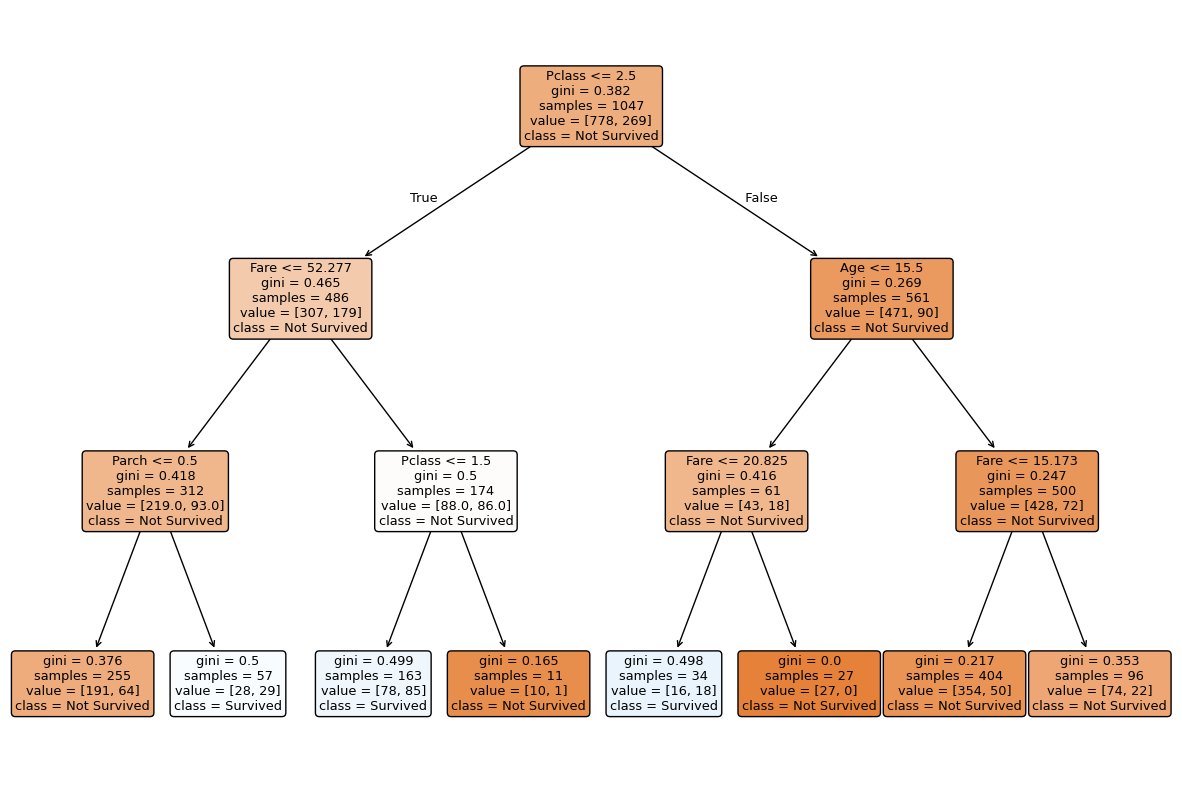

In [44]:
# prompt: Please write code to dispaly a decision tree in a figure

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(decision_tree, feature_names=list(X.columns), class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.show()

This implementation provides a basic model for predicting Titanic survival using a Decision Tree, demonstrating the power of tree-based models for classification tasks. The decision tree's interpretability allows us to understand the most important features driving the predictions.